In [1]:
import pandas as pd

def create_df_from_sheet(sheet: str) -> pd.DataFrame:
    df = pd.read_excel("./all data(from manon).xlsx", sheet_name=sheet)
    df.columns = df.iloc[1]
    df = df.iloc[2:]
    if len(df.columns) > 4:
        df.drop(columns=df.columns[-2:], axis=1, inplace=True)
    df.columns = ["timestamp", "no_units", "RangeCAL_uS", "SkinResistanceCAL_kOhms"]
    return df


def plot_df(df: pd.DataFrame):
    df.iloc[:, [0, 1]].plot()
    df.iloc[:, [0, 2]].plot()
    df.iloc[:, [0, 3]].plot()
    # print("hi mom")

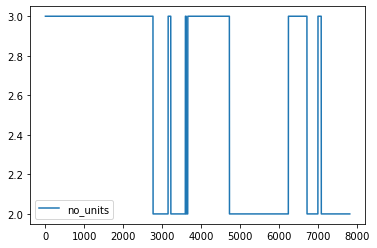

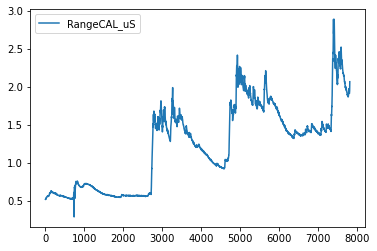

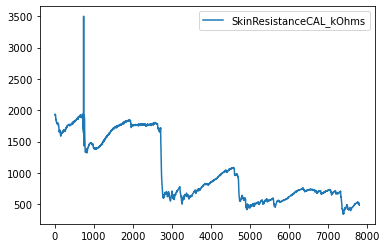

In [2]:
test612_1 = create_df_from_sheet("612_1")
plot_df(test612_1)

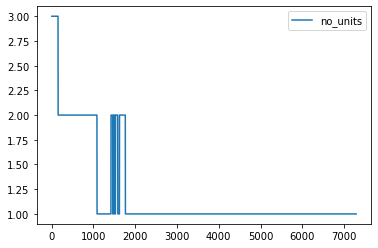

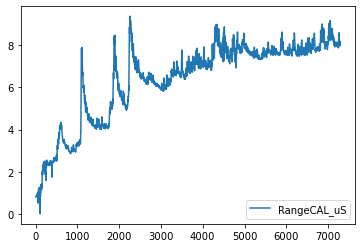

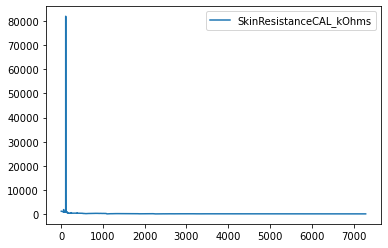

In [3]:
test612_2 = create_df_from_sheet("612_2")
plot_df(test612_2)

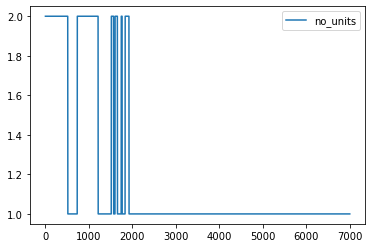

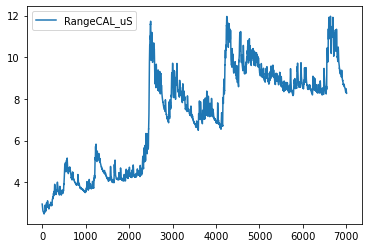

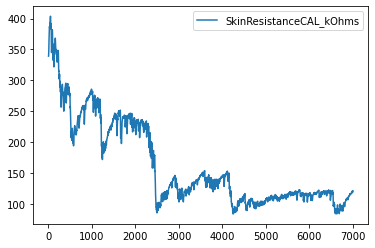

In [4]:
test612_3 = create_df_from_sheet("612_3")
plot_df(test612_3)

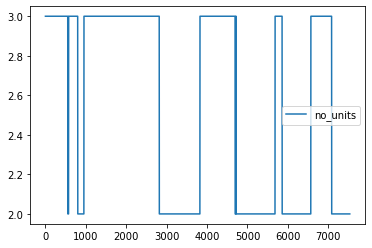

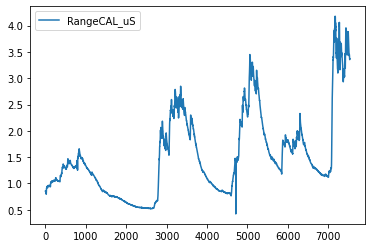

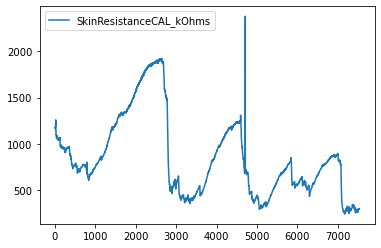

In [5]:
test612_4 = create_df_from_sheet("612_4")
plot_df(test612_4)

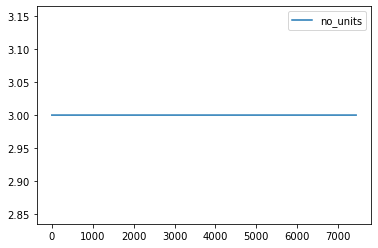

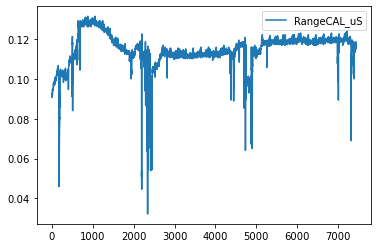

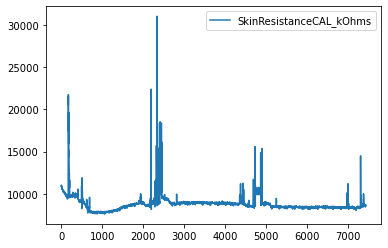

In [6]:
test612_5 = create_df_from_sheet("612_5")
plot_df(test612_5)

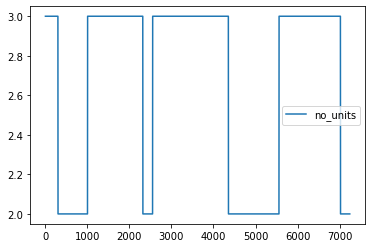

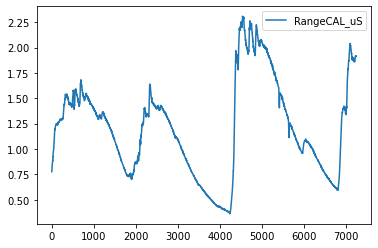

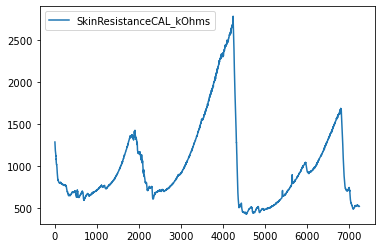

In [7]:
test612_6 = create_df_from_sheet("612_6")
plot_df(test612_6)

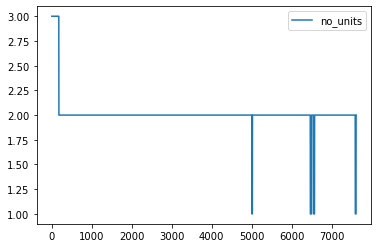

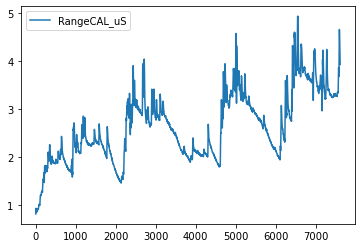

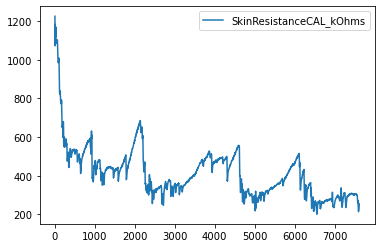

In [8]:
test612_7 = create_df_from_sheet("612_7")
plot_df(test612_7)

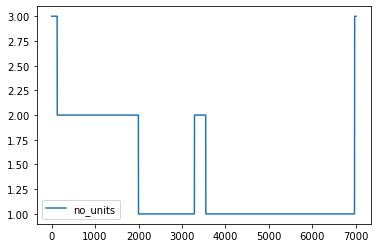

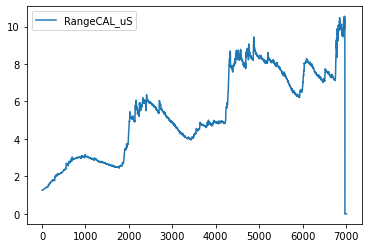

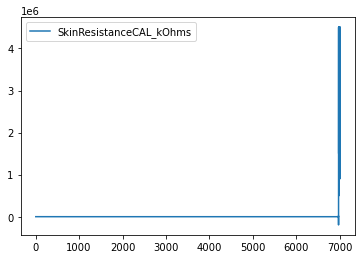

In [9]:
test712_1 = create_df_from_sheet("712_1")
plot_df(test712_1)

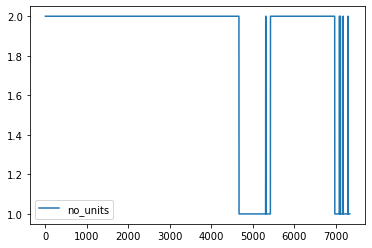

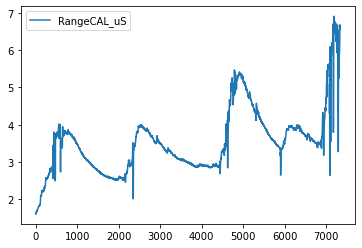

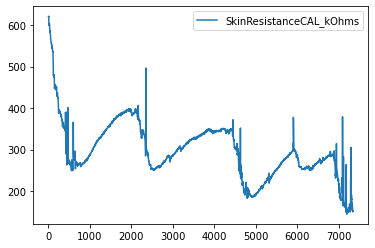

In [10]:
test712_2 = create_df_from_sheet("712_2")
plot_df(test712_2)

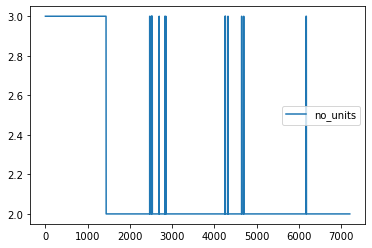

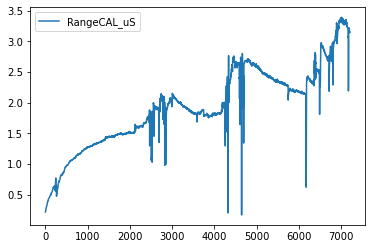

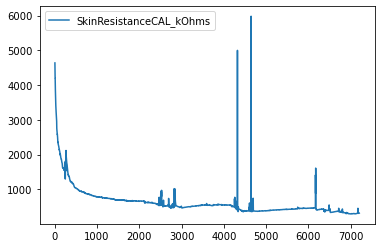

In [11]:
test712_3 = create_df_from_sheet("712_3")
plot_df(test712_3)

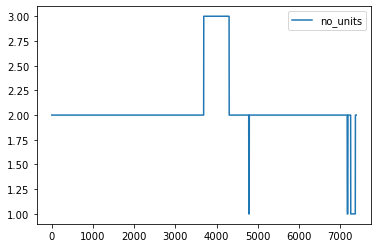

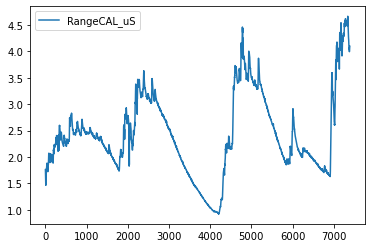

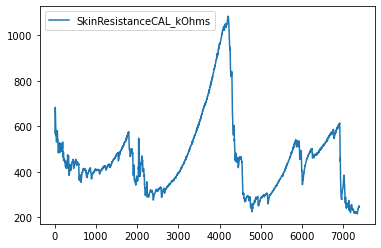

In [12]:
test712_4 = create_df_from_sheet("712_4")
plot_df(test712_4)

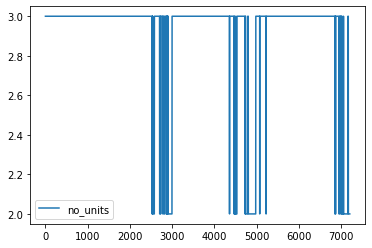

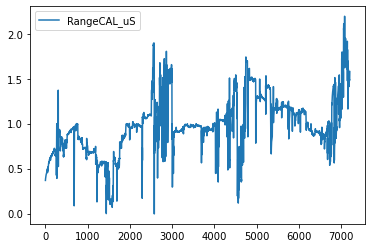

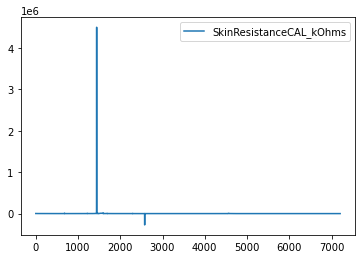

In [13]:
test712_5 = create_df_from_sheet("712_5")
plot_df(test712_5)

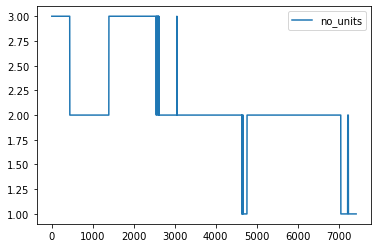

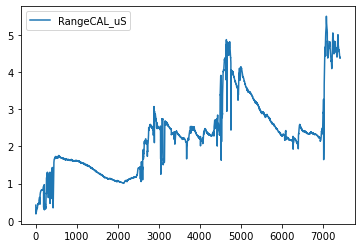

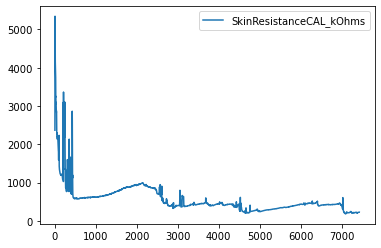

In [14]:
test712_6 = create_df_from_sheet("712_6")
plot_df(test712_6)

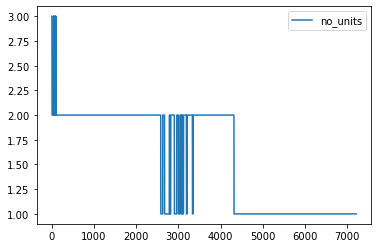

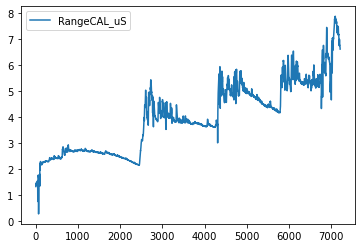

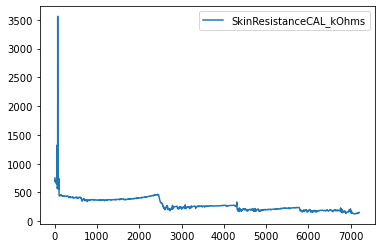

In [15]:
test712_7 = create_df_from_sheet("712_7")
plot_df(test712_7)

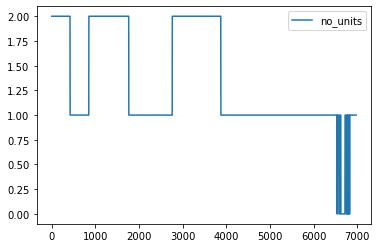

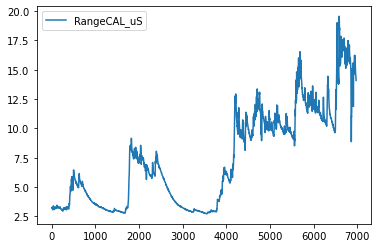

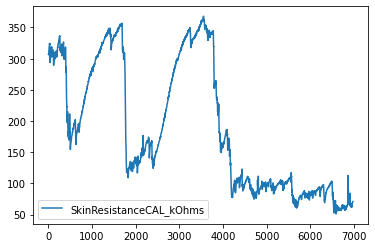

In [16]:
test712_8 = create_df_from_sheet("712_8")
plot_df(test712_8)

In [17]:
dfTemp = test712_6
df1_1 = dfTemp.iloc[:, [0, 1]]
df1_2 = dfTemp.iloc[:, [0, 2]]
df1_3 = dfTemp.iloc[:, [0, 3]]
df1_2

timestamp RangeCAL_uS
2     2021/12/07 16:33:05.584    0.422466
3     2021/12/07 16:33:05.834    0.284826
4     2021/12/07 16:33:06.084    0.188478
5     2021/12/07 16:33:06.334    0.187146
6     2021/12/07 16:33:06.584     0.18759
...                       ...         ...
7424  2021/12/07 17:04:01.776    4.377736
7425  2021/12/07 17:04:02.026    4.377736
7426  2021/12/07 17:04:02.276    4.372631
7427  2021/12/07 17:04:02.526    4.377736
7428  2021/12/07 17:04:02.776    4.377736

[7427 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427 entries, 2 to 7428
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      7427 non-null   object 
 1   RangeCAL_uS    7427 non-null   object 
 2   RollingMean    7388 non-null   float64
 3   RollingMedian  7388 non-null   float64
 4   deltaMean      7368 non-null   float64
 5   deltaMedian    7368 non-null   float64
dtypes: float64(4), object(2)
memory usage: 348.3+ KB


<AxesSubplot:>

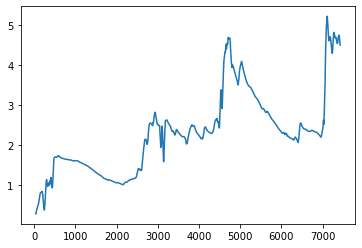

In [90]:

df1_2.info()
df1_2['RollingMean'] = df1_2['RangeCAL_uS'].rolling(40).mean() # rolling average of 10 seconds (4 units = 1 second)

df1_2['RollingMedian'] = df1_2['RangeCAL_uS'].rolling(40).median() # rolling median of 10 seconds
df1_2['deltaMean'] = df1_2.RollingMean.diff(periods =20)
df1_2['deltaMedian'] = df1_2.RollingMedian.diff(periods =20)
df1_2['RollingMean'].plot()

In [81]:
anomaly_detection_df = df1_2[['timestamp', 'RollingMean']].copy().dropna()
anomaly_detection_df = anomaly_detection_df.reset_index()
# anomaly_detection_df['time_index'] = anomaly_detection_df.index
anomaly_detection_df

index                timestamp  RollingMean  time_index
0        41  2021/12/07 16:33:15.334     0.290077           0
1        42  2021/12/07 16:33:15.584     0.288301           1
2        43  2021/12/07 16:33:15.834     0.290720           2
3        44  2021/12/07 16:33:16.084     0.296570           3
4        45  2021/12/07 16:33:16.334     0.302631           4
...     ...                      ...          ...         ...
7383   7424  2021/12/07 17:04:01.776     4.520172        7383
7384   7425  2021/12/07 17:04:02.026     4.512514        7384
7385   7426  2021/12/07 17:04:02.276     4.505239        7385
7386   7427  2021/12/07 17:04:02.526     4.498347        7386
7387   7428  2021/12/07 17:04:02.776     4.491455        7387

[7388 rows x 4 columns]

C:\Users\daanb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


      index                timestamp  RollingMean  time_index    scores  \
0        41  2021/12/07 16:33:15.334     0.290077           0 -0.145685   
1        42  2021/12/07 16:33:15.584     0.288301           1 -0.160087   
2        43  2021/12/07 16:33:15.834     0.290720           2 -0.144778   
3        44  2021/12/07 16:33:16.084     0.296570           3 -0.145414   
4        45  2021/12/07 16:33:16.334     0.302631           4 -0.140748   
...     ...                      ...          ...         ...       ...   
7243   7284  2021/12/07 17:03:26.777     4.774157        7243 -0.020175   
7244   7285  2021/12/07 17:03:27.027     4.767393        7244 -0.018847   
7245   7286  2021/12/07 17:03:27.277     4.760373        7245 -0.014166   
7246   7287  2021/12/07 17:03:27.527     4.753609        7246 -0.024717   
7247   7288  2021/12/07 17:03:27.777     4.747993        7247 -0.013500   

      anomaly  
0          -1  
1          -1  
2          -1  
3          -1  
4          -1  
...

<AxesSubplot:>

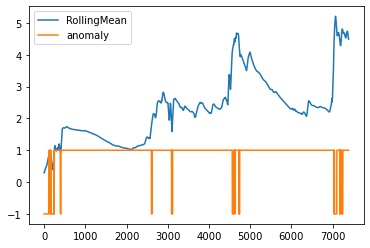

In [94]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(random_state=0, contamination=0.05, n_estimators=200, max_samples=0.7)
model_data = anomaly_detection_df[['RollingMean']]
IF.fit(model_data)

anomaly_detection_df['scores']=IF.decision_function(model_data)
anomaly_detection_df['anomaly']=IF.predict(model_data)

anomaly=anomaly_detection_df.loc[anomaly_detection_df['anomaly']==-1]
anomaly_index=list(anomaly.index)

print(anomaly)
print(anomaly_index)

anomaly_detection_df[['RollingMean', 'anomaly']].plot()